In [ ]:
import sys
import os

# 获取当前 notebook 所在目录
current_dir = os.getcwd()

# 找到 src 目录：上一级目录(project/) + src/
src_path = os.path.join(os.path.dirname(current_dir), 'src')

# 加入 sys.path
if src_path not in sys.path:
    sys.path.append(src_path)

In [5]:
from nms import non_max_suppression_torch
from dataset import BIPEDv2

In [ ]:
# image_path = "/home/yangk/intership_2025_COSYS/resource/DexiNed/BIPEDv2/BIPED/edges/imgs/train/rgbr/real/"
# edge_path = "/home/yangk/intership_2025_COSYS/resource/DexiNed/BIPEDv2/BIPED/edges/edge_maps/train/rgbr/real/"
# ds = BIPEDv2(image_path, edge_path, return_map=True)

In [11]:
import torch
import cv2
import numpy as np

img = torch.randn(720, 480).detach().numpy()
# Sobel 边缘 + 方向
gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

mag = np.hypot(gx, gy).astype(np.float32)
dir = np.degrees(np.arctan2(gy, gx)).astype(np.float32)

# 转换为 PyTorch Tensor
edge_mag_t = torch.tensor(mag).unsqueeze(0).unsqueeze(0)  # shape (1, 1, H, W)
edge_dir_t = torch.tensor(dir).unsqueeze(0).unsqueeze(0)

# 应用 NMS
nms_edge = non_max_suppression_torch(edge_mag_t, edge_dir_t)

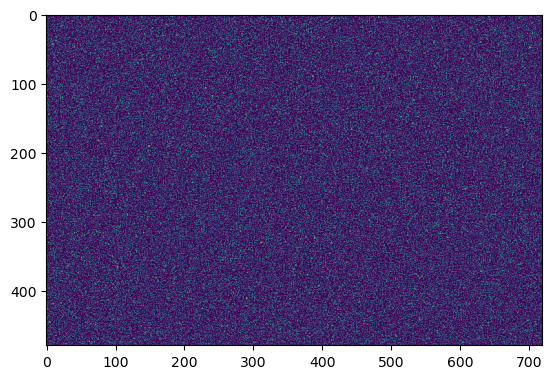

In [13]:
import matplotlib.pyplot as plt
plt.imshow(nms_edge[0][0].T)
plt.show()
